## Introduction to NLP   at Karakun             Part 1     

In [1]:
import nltk              
import random
random.seed(0)

# Sentiment analysis with word list and naïve Bayes
Gives a baseline for more advanced methods.

In [2]:
train_pos_reviews=[]
train_neg_reviews=[]
test_pos_reviews=[]
test_neg_reviews=[]

with open('./Sentiment-Analysis-Data/imdb/train-pos.txt','r') as f:
    for line in f:
        train_pos_reviews.append((line,'pos'))
f.close()

with open('./Sentiment-Analysis-Data/imdb/train-neg.txt','r') as f:
    for line in f:
        train_neg_reviews.append((line,'neg'))
f.close()

with open('./Sentiment-Analysis-Data/imdb/test-pos.txt','r') as f:
    for line in f:
        test_pos_reviews.append((line,'pos'))
f.close()

with open('./Sentiment-Analysis-Data/imdb/test-neg.txt','r') as f:
    for line in f:
        test_pos_reviews.append((line,'neg'))
f.close()

train_reviews = []
test_reviews = []

for (words, sentiment) in train_pos_reviews + train_neg_reviews:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 2]
    train_reviews.append((words_filtered, sentiment))

for (words, sentiment) in test_pos_reviews + test_neg_reviews:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 2]
    test_reviews.append((words_filtered, sentiment))

In [3]:
print( len(train_reviews) , len(test_reviews))

25000 25000


In [4]:
print(train_reviews[230][0][:60] , '\n\n' , train_reviews[230][1])

['this', 'film', 'has', 'renewed', 'my', 'interest', 'in', 'french', 'cinema', 'the', 'story', 'is', 'enchanting', 'the', 'acting', 'is', 'flawless', 'and', 'audrey', 'tautou', 'is', 'absolutely', 'beautiful', 'imagine', 'that', 'we', 'will', 'be', 'seeing', 'lot', 'more', 'of', 'her', 'in', 'the', 'states', 'after', 'her', 'upcoming', 'role', 'in', 'amelie'] 

 pos


In [5]:
' '.join(word for word in train_reviews[230][0] )

'this film has renewed my interest in french cinema the story is enchanting the acting is flawless and audrey tautou is absolutely beautiful imagine that we will be seeing lot more of her in the states after her upcoming role in amelie'

In [6]:
random.shuffle(train_reviews)
random.shuffle(test_reviews)

In [7]:
print(train_reviews[230][0][:60] , '\n\n' , train_reviews[230][1])

['judy', 'davis', 'shows', 'us', 'here', 'why', 'she', 'is', 'one', 'of', 'australia', 'most', 'respected', 'and', 'loved', 'actors', 'her', 'portrayal', 'of', 'lonely', 'directionless', 'nomad', 'is', 'first', 'rate', 'teenaged', 'claudia', 'karvan', 'also', 'gives', 'us', 'glimpse', 'of', 'what', 'would', 'make', 'her', 'one', 'of', 'this', 'country', 'most', 'popular', 'actors', 'in', 'years', 'to', 'come', 'with', 'future', 'roles', 'in', 'the', 'big', 'steal', 'the', 'heartbreak', 'kid', 'dating', 'the'] 

 pos


In [7]:
for i in range(10):
    print(test_reviews[i][1])

neg
pos
pos
neg
pos
pos
neg
neg
pos
pos


In [8]:
N_test= int(len(test_reviews)/2)

In [9]:
eval_reviews = test_reviews[:N_test]
test_reviews = test_reviews[N_test:]
print(len(train_reviews),len(test_reviews),len(eval_reviews))

25000 12500 12500


In [10]:
all_words = []
for (words, sentiment) in train_reviews+eval_reviews+test_reviews:
    all_words.extend(words)
    
wordlist = nltk.FreqDist(all_words)

In [11]:
print('all words in the reviews: ',len(all_words) )
print('size of dictionary: ',len(wordlist) )

all words in the reviews:  10977368
size of dictionary:  100641


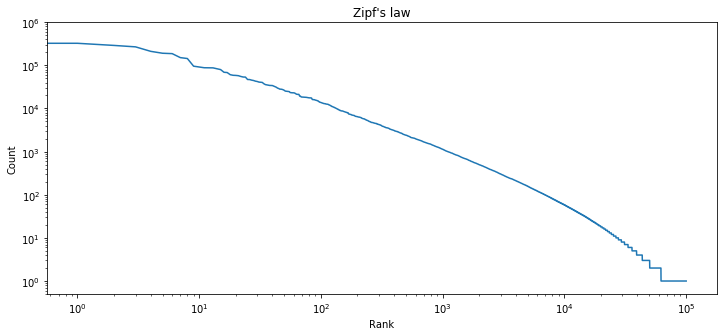

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# get frequencies and sort
frequencies = []
for token,freq in wordlist.items():
    frequencies.append(freq)

#plot results
plt.figure(figsize=(12,5))
plt.plot(sorted(frequencies, reverse=True))
plt.title("Zipf's law")
plt.xlabel('Rank')
plt.xscale('log')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim([0.5,1e6])
plt.show()

In [13]:
wordlist.most_common(10)        

[('the', 667875),
 ('and', 324436),
 ('of', 289410),
 ('to', 268122),
 ('is', 211079),
 ('it', 190713),
 ('in', 186780),
 ('this', 151001),
 ('that', 143844),
 ('was', 95608)]

In [14]:
print( wordlist['go'], wordlist['goes'], wordlist['gone'], wordlist['going'], wordlist['went'])
print( wordlist['am'], wordlist['are'], wordlist['is'], wordlist['be'])

9961 4759 1550 8190 3009
5795 58386 211079 53383


In [15]:
from nltk.corpus import stopwords
stopwords_E = stopwords.words('english')

In [16]:
wordlist['the']

667875

In [17]:
wordlist_stopped = nltk.FreqDist([ w for w in all_words if w.isalpha() and w not in stopwords_E ])
wordlist_stopped['the']

0

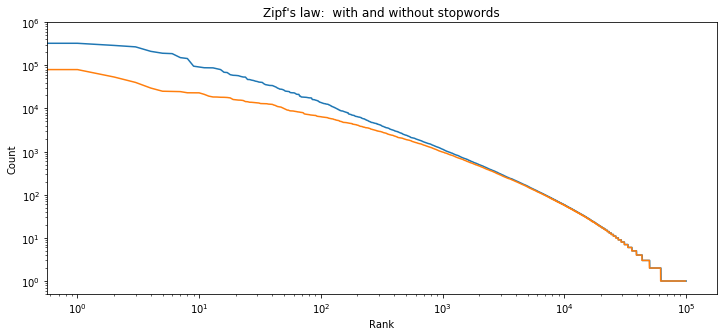

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# get frequencies and sort
frequencies_2 = []
for token,freq in wordlist_stopped.items():
    frequencies_2.append(freq)

#plot results
plt.figure(figsize=(12,5))
plt.plot(sorted(frequencies, reverse=True))
plt.plot(sorted(frequencies_2, reverse=True))
plt.title("Zipf's law:  with and without stopwords")
plt.xlabel('Rank')
plt.xscale('log')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim([0.5,1e6])
plt.show()

###  Simple word list based sentiments
Using AFINN-111 from Finn Årup Nielsen. Contains 2477 English words and phrases rated with an integer between -5 and +5.
http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010

In [19]:
from collections import defaultdict

sentiment_dict = defaultdict(int)
for line in open('./Sentiment-Analysis-Data/AFINN/AFINN-111.txt'):
    word,sent = line.split('\t')
    sentiment_dict[word] = int(sent)

In [20]:
print(len(sentiment_dict.items()) ,'\n')
print(list(sentiment_dict.items())[:20] , '\n')
print("'awesome' has sentiment",sentiment_dict['awesome'],"  /   'horrible' has sentiment",sentiment_dict['horrible'] , '\n')
print([(word,sent) for (word,sent) in sentiment_dict.items() if sent ==5 ] )

2477 

[('abandon', -2), ('abandoned', -2), ('abandons', -2), ('abducted', -2), ('abduction', -2), ('abductions', -2), ('abhor', -3), ('abhorred', -3), ('abhorrent', -3), ('abhors', -3), ('abilities', 2), ('ability', 2), ('aboard', 1), ('absentee', -1), ('absentees', -1), ('absolve', 2), ('absolved', 2), ('absolves', 2), ('absolving', 2), ('absorbed', 1)] 

'awesome' has sentiment 4   /   'horrible' has sentiment -3 

[('breathtaking', 5), ('hurrah', 5), ('outstanding', 5), ('superb', 5), ('thrilled', 5)]


In [21]:
sort_words= [ w for (w,_) in sentiment_dict.items() ]
print(sorted(sort_words[:100]))

['abandon', 'abandoned', 'abandons', 'abducted', 'abduction', 'abductions', 'abhor', 'abhorred', 'abhorrent', 'abhors', 'abilities', 'ability', 'aboard', 'absentee', 'absentees', 'absolve', 'absolved', 'absolves', 'absolving', 'absorbed', 'abuse', 'abused', 'abuses', 'abusive', 'accept', 'accepted', 'accepting', 'accepts', 'accident', 'accidental', 'accidentally', 'accidents', 'accomplish', 'accomplished', 'accomplishes', 'accusation', 'accusations', 'accuse', 'accused', 'accuses', 'accusing', 'ache', 'achievable', 'aching', 'acquit', 'acquits', 'acquitted', 'acquitting', 'acrimonious', 'active', 'adequate', 'admire', 'admired', 'admires', 'admiring', 'admit', 'admits', 'admitted', 'admonish', 'admonished', 'adopt', 'adopts', 'adorable', 'adore', 'adored', 'adores', 'advanced', 'advantage', 'advantages', 'adventure', 'adventures', 'adventurous', 'affected', 'affection', 'affectionate', 'afflicted', 'affronted', 'afraid', 'aggravate', 'aggravated', 'aggravates', 'aggravating', 'aggressi

In [22]:
wordlist = ['awesome','awful','bad','badly','better','excellent','good','great','horrible','like','lol','very','terrible','woods','wow']
for w in wordlist:
    print(" %10s : %3d" % (w,sentiment_dict[w]))

    awesome :   4
      awful :  -3
        bad :  -3
      badly :  -3
     better :   2
  excellent :   3
       good :   3
      great :   3
   horrible :  -3
       like :   2
        lol :   3
       very :   0
   terrible :  -3
      woods :   0
        wow :   4


In [23]:
def compare(threshold):
    gold =[]
    predicted = []
    for i in range(len(test_reviews)):
        (sentence, score) = test_reviews[i]
        gold.append(score)
        sentiment = sum(sentiment_dict[w] for w in sentence)
        if sentiment > threshold:
            predicted.append('pos')
        else:
            predicted.append('neg')
        
    cm = nltk.ConfusionMatrix(gold, predicted)
    print("accuracy with AFINN rated words: %5.3f %%" % ((cm['pos','pos']+cm['neg','neg'])/
                            (1.0*cm['pos','pos']+cm['neg','neg']+cm['pos','neg']+cm['neg','pos'])*100) )
    print(cm.pretty_format(sort_by_count=True, show_percents=True) )

In [24]:
compare(6)   # 6.0   -->  71.7 %

accuracy with AFINN rated words: 71.744 %
    |      p      n |
    |      o      e |
    |      s      g |
----+---------------+
pos | <33.8%> 16.3% |
neg |  12.0% <38.0%>|
----+---------------+
(row = reference; col = test)



In [25]:
test_text = 'This product is great, we love it. But stupid price, horrendous. At most affordable for Christmas!' 

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize

test_word = word_tokenize( test_text.lower() )
score = 0.0
for i in range(len(test_word)):
    if sentiment_dict[test_word[i]] != 0:
        score += sentiment_dict[test_word[i]]
        print(" %10s : %2d" % (test_word[i],sentiment_dict[test_word[i]]) )

print('\n' ,'Sentiment score :', score)



      great :  3
       love :  3
     stupid : -2
 horrendous : -3

 Sentiment score : 1.0


In [27]:
test_sents = sent_tokenize( test_text.lower() )
for i in range(len(test_sents)):
    print(" %-36s : %3d" % (test_sents[i], sum(sentiment_dict[w] for w in word_tokenize(test_sents[i])) ) )

 this product is great, we love it.   :   6
 but stupid price, horrendous.        :  -5
 at most affordable for christmas!    :   0


## Intermezzo:   WordNet sentiment scores 
NLTK-Book Chap 2 :  WordNet is a very large semantic English dictionary, with 155,287 words and 117,659 synonym sets.

WordNet contains 110K nouns, 11K verbs, 22K adjectives, 4.5K adverbs.

Beside sentiment scores, WordNet has a rich structure with synonyms, antonyms, hypernyms, hyponyms, holonyms and meronyms.

In [28]:
from nltk.corpus import sentiwordnet as swn      #   sentiment scores for 145k WordNet synonym sets
from nltk.corpus import wordnet as wn

In [29]:
print(wn.synsets('bass') )

[Synset('bass.n.01'), Synset('bass.n.02'), Synset('bass.n.03'), Synset('sea_bass.n.01'), Synset('freshwater_bass.n.01'), Synset('bass.n.06'), Synset('bass.n.07'), Synset('bass.n.08'), Synset('bass.s.01')]


In [30]:
print(wn.synset('bass.n.01').definition() )
print(wn.synset('bass.n.02').definition() )
print(wn.synset('bass.n.03').definition() )
print(wn.synset('sea_bass.n.01').definition() )
print(wn.synset('freshwater_bass.n.01').definition() )
print(wn.synset('bass.n.06').definition() )
print(wn.synset('bass.n.07').definition() )
print(wn.synset('bass.n.08').definition() )
print(wn.synset('bass.s.01').definition() )

the lowest part of the musical range
the lowest part in polyphonic music
an adult male singer with the lowest voice
the lean flesh of a saltwater fish of the family Serranidae
any of various North American freshwater fish with lean flesh (especially of the genus Micropterus)
the lowest adult male singing voice
the member with the lowest range of a family of musical instruments
nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
having or denoting a low vocal or instrumental range


In [31]:
print(swn.senti_synset('bass.s.01') ) # senti-score

<bass.s.01: PosScore=0.0 NegScore=0.25>


In [32]:
def WordNet_Distance(A,B):
    start = wn.synsets(A)[0]
    end = wn.synsets(B)[0]
    via = start.lowest_common_hypernyms(end)[0]
    start = start.name() ;end = end.name();via = via.name()
    step_up = wn.synset(start).min_depth() - wn.synset(via).min_depth()
    step_down = wn.synset(end).min_depth() - wn.synset(via).min_depth()
    print(A+' and '+B+' have an ontological distance: ',step_up+step_down), print() 
    for w in range(step_up):
        entity = wn.synset(start).hypernyms()
        entity = entity[0].name()
        depth  = wn.synset(entity).min_depth()
        print('{0:27} has hypernym    '.format(start), '{0:27} '.format(entity), 'with depth: ' ,depth)
        start = entity
    
    print()
    
    string = ['']*step_down
    for w in range(step_down):
        entity = wn.synset(end).hypernyms()
        entity = entity[0].name()
        depth  = wn.synset(entity).min_depth()
        string[w] = ['{0:27}'.format(entity)+' has hyponym      ''{0:27}'.format(end)+'  with depth   '+repr(depth)]
        end = entity
        
    for w in range(step_down):
        print(string[step_down-w-1][0] )

In [33]:
WordNet_Distance('love','like')

love and like have an ontological distance:  13

love.n.01                   has hypernym     emotion.n.01                 with depth:  5
emotion.n.01                has hypernym     feeling.n.01                 with depth:  4
feeling.n.01                has hypernym     state.n.02                   with depth:  3
state.n.02                  has hypernym     attribute.n.02               with depth:  2
attribute.n.02              has hypernym     abstraction.n.06             with depth:  1

abstraction.n.06            has hyponym      psychological_feature.n.01   with depth   1
psychological_feature.n.01  has hyponym      cognition.n.01               with depth   2
cognition.n.01              has hyponym      content.n.05                 with depth   3
content.n.05                has hyponym      idea.n.01                    with depth   4
idea.n.01                   has hyponym      concept.n.01                 with depth   5
concept.n.01                has hyponym      category.n.02  

In [34]:
syn='love.n.01'    # syn='abstraction.n.06'
print(wn.synset(syn).definition() )
print(wn.synset(syn).examples() )
print(wn.synset(syn).max_depth() )
print(wn.synset(syn).hypernyms() )
print(wn.synset(syn).root_hypernyms() )
print()
print(swn.senti_synset(syn) )

a strong positive emotion of regard and affection
['his love for his work', 'children need a lot of love']
6
[Synset('emotion.n.01')]
[Synset('entity.n.01')]

<love.n.01: PosScore=0.625 NegScore=0.0>


In [35]:
print(wn.synset('eat.v.01').entailments() )                  # see NLTK-book Chap. 2
print(wn.lemma('supply.n.02.supply').antonyms() )
print()
print(wn.synset('tree.n.01').member_holonyms() )
print(wn.synset('tree.n.01').part_meronyms() )
print(wn.synset('tree.n.01').substance_meronyms() )
print()
print(wn.synset('tree.n.01').hypernyms() )
print(wn.synset('tree.n.01').hyponyms() )

[Synset('chew.v.01'), Synset('swallow.v.01')]
[Lemma('demand.n.02.demand')]

[Synset('forest.n.01')]
[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]
[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

[Synset('woody_plant.n.01')]
[Synset('aalii.n.01'), Synset('acacia.n.01'), Synset('african_walnut.n.01'), Synset('albizzia.n.01'), Synset('alder.n.02'), Synset('angelim.n.01'), Synset('angiospermous_tree.n.01'), Synset('anise_tree.n.01'), Synset('arbor.n.01'), Synset('aroeira_blanca.n.01'), Synset('ash.n.02'), Synset('australian_nettle.n.01'), Synset('balata.n.02'), Synset('bayberry.n.01'), Synset('bean_tree.n.01'), Synset('beech.n.01'), Synset('birch.n.02'), Synset('bitterwood_tree.n.01'), Synset('black_mangrove.n.01'), Synset('blackwood.n.02'), Synset('bloodwood_tree.n.01'), Synset('bonduc.n.02'), Synset('bonsai.n.01'), Synset('bottle-tree.n.01'), Synset('brazilian_ironwood.n.01'), Synset('brazilian_pepper_tree.n.01'), Synset(

## Sentiment classification with naïve Bayes 

In [36]:
dict_size = 2000
word_features = [ w for (w,_) in list(wordlist_stopped.most_common())[:dict_size]] 
print(len(wordlist_stopped))
print(len(word_features))

99212
2000


In [37]:
print(word_features[:20])

['movie', 'film', 'one', 'like', 'good', 'time', 'even', 'would', 'story', 'really', 'see', 'well', 'much', 'bad', 'get', 'people', 'great', 'also', 'first', 'made']


In [38]:
def features_oneHot(review):
    review_words = set(review)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in review_words)
    return features

In [39]:
features_oneHot(train_reviews[0][0])

{'contains(movie)': True,
 'contains(film)': True,
 'contains(one)': False,
 'contains(like)': True,
 'contains(good)': True,
 'contains(time)': False,
 'contains(even)': False,
 'contains(would)': True,
 'contains(story)': False,
 'contains(really)': False,
 'contains(see)': False,
 'contains(well)': True,
 'contains(much)': False,
 'contains(bad)': True,
 'contains(get)': True,
 'contains(people)': False,
 'contains(great)': False,
 'contains(also)': False,
 'contains(first)': False,
 'contains(made)': False,
 'contains(make)': False,
 'contains(way)': False,
 'contains(could)': True,
 'contains(movies)': False,
 'contains(characters)': False,
 'contains(think)': False,
 'contains(watch)': True,
 'contains(character)': False,
 'contains(films)': False,
 'contains(two)': False,
 'contains(many)': False,
 'contains(seen)': True,
 'contains(love)': False,
 'contains(plot)': False,
 'contains(never)': True,
 'contains(life)': False,
 'contains(acting)': False,
 'contains(show)': True,
 '

In [40]:
train_featureset = [(features_oneHot(d), c) for (d,c) in train_reviews]
test_featureset  = [(features_oneHot(d), c) for (d,c) in test_reviews ]

In [41]:
classifier = nltk.NaiveBayesClassifier.train(train_featureset)
print(nltk.classify.accuracy(classifier, test_featureset))            #    84.46%

0.84464


In [42]:
classifier.show_most_informative_features(10)

Most Informative Features
       contains(unfunny) = True              neg : pos    =     14.1 : 1.0
         contains(waste) = True              neg : pos    =     12.5 : 1.0
     contains(pointless) = True              neg : pos    =     10.4 : 1.0
     contains(redeeming) = True              neg : pos    =     10.1 : 1.0
     contains(laughable) = True              neg : pos    =      9.1 : 1.0
         contains(worst) = True              neg : pos    =      9.0 : 1.0
         contains(awful) = True              neg : pos    =      8.4 : 1.0
        contains(poorly) = True              neg : pos    =      8.2 : 1.0
   contains(wonderfully) = True              pos : neg    =      7.6 : 1.0
         contains(sucks) = True              neg : pos    =      7.1 : 1.0


In [43]:
gold = [sent for (_,sent) in test_featureset ] 
test = [classifier.classify( review ) for (review,_) in test_featureset]
cm = nltk.ConfusionMatrix(gold, test)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

    |      p      n |
    |      o      e |
    |      s      g |
----+---------------+
pos | <42.3%>  7.7% |
neg |   7.8% <42.1%>|
----+---------------+
(row = reference; col = test)




###  Classification based on only 15 words
Just to show that 15 task-specific words yield a higher accuracy than the approx. 2500 words from AFINN.

In [44]:
selected_words = ['unfunny','waste','pointless','redeeming','laughable','worst','awful','poorly','wonderfully','sucks',
                  'bad','lovely','boring','great','happy']
len(selected_words)

15

In [45]:
def features_selected(review):
    review_words = set(review)
    features = {}
    for word in selected_words:
        features['contains({})'.format(word)] = (word in review_words)
    return features

In [46]:
train_featureset = [(features_selected(d), c) for (d,c) in train_reviews]
test_featureset  = [(features_selected(d), c) for (d,c) in test_reviews ]
classifier = nltk.NaiveBayesClassifier.train(train_featureset)
print(nltk.classify.accuracy(classifier, test_featureset))
classifier.show_most_informative_features(15)                             # 0.7284   better than AFINN 

0.7284
Most Informative Features
       contains(unfunny) = True              neg : pos    =     14.1 : 1.0
         contains(waste) = True              neg : pos    =     12.5 : 1.0
     contains(pointless) = True              neg : pos    =     10.4 : 1.0
     contains(redeeming) = True              neg : pos    =     10.1 : 1.0
     contains(laughable) = True              neg : pos    =      9.1 : 1.0
         contains(worst) = True              neg : pos    =      9.0 : 1.0
         contains(awful) = True              neg : pos    =      8.4 : 1.0
        contains(poorly) = True              neg : pos    =      8.2 : 1.0
   contains(wonderfully) = True              pos : neg    =      7.6 : 1.0
         contains(sucks) = True              neg : pos    =      7.1 : 1.0
        contains(boring) = True              neg : pos    =      4.0 : 1.0
           contains(bad) = True              neg : pos    =      2.9 : 1.0
        contains(lovely) = True              pos : neg    =      2.